In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def draw_line(x0, y0, x1, y1,color1,color2,gran, arr):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    deltac = ((color2 - color1) / np.sqrt(dx * dx + dy * dy)).astype("float64")
    color = np.array(color1.copy().astype("float64"))
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    if dx > dy:
        err = dx / 2
        while x != x1:
            vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, 1], [color[0],color[1],color[2]]])
            color += deltac
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2
        while y != y1:
            vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, 1], [color[0],color[1],color[2]]])         
            color += deltac
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    vp[y:y+gran, x:x+gran] = color
    arr.append([[x,y, 1], [color[0],color[1],color[2]]])    
    return arr


In [3]:
def Zalivka_Grad(vp, right, left, num, arr):
    if num == 1:
        left.sort(key=lambda x: x[0][1])
        right.sort(key=lambda x: x[0][1])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                if y_l == y_r:
                    vp[y_r, x_l:x_r] = right[i][1]

                    for k in range(1, abs(x_l-x_r) + 1):
                        arr.append([[x_l + k,y_l,1], right[i][1]])
    if num == 0:
        left.sort(key=lambda x: x[0][0])
        right.sort(key=lambda x: x[0][0])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                if x_l == x_r:
                    vp[y_l:y_r, x_l] = right[i][1]
                    for k in range(1, abs(y_l - y_r) + 1):
                        arr.append([[x_l, y_l + k, 1], right[i][1]])
    return vp,arr

In [4]:
def createfigure(num,color1,color2,arr,gran):
    x_center_1 =x_cent+ step
    y_center_1 = y_cent + int(step**2)

    x_center_2 = x_center_1+step
    y_center_2 = y_cent + int((2*step)**2)
    right = []
    left = []
    #vpravo
    if num == 0:
        # odna vetv (nyzhnaya)
        arr = draw_line(y_cent,x_cent,y_center_1,x_center_1,color1,color2,gran, arr)
        arr.pop(len(arr)-1)
        arr = draw_line(y_center_1,x_center_1,y_center_2,x_center_2,color2,color1,gran,arr)
        arr.pop(len(arr)-1)
        
        right = draw_line(y_cent,x_cent,y_center_1,x_center_1,color1,color2,gran,  right)
        right.pop(len(right)-1)
        right = draw_line(y_center_1,x_center_1,y_center_2,x_center_2,color2,color1,gran, right)
        right.pop(len(right)-1)


        # krishka
        arr = draw_line(y_center_2,x_center_2,y_center_2,x_cent,color1,color2,gran, arr)
        arr.pop(len(arr)-1)
        
        x_center_1 =x_cent - step
        x_center_2 = x_center_1 - step
        
#         vtorai vetv (verhnaya)
        arr = draw_line(y_center_1,x_center_1,y_cent,x_cent,color2,color1,gran, arr)
        arr.pop(len(arr)-1)
        
        arr = draw_line(y_center_2,x_center_2,y_center_1,x_center_1,color1,color2,gran, arr)
        arr.pop(len(arr)-1)
        
        left = draw_line(y_center_1,x_center_1,y_cent,x_cent,color2,color1,gran, left)
        left.pop(len(left)-1)
        
        left = draw_line(y_center_2,x_center_2,y_center_1,x_center_1,color1,color2,gran, left)
        left.pop(len(left)-1)
        
        # krishka
        arr = draw_line(y_center_2,x_center_2,y_center_2,x_cent,color1,color2,gran,arr)
        arr.pop(len(arr)-1)
        
#     vnis  
    
    if num == 1:
        # odna vetv (pravaya)

        arr=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,arr)
        arr.pop(len(arr)-1)
        arr=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, arr)
        arr.pop(len(arr)-1)
        
        
        right=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,right)
        right.pop(len(right)-1)
        right=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, right)
        right.pop(len(right)-1)
          
                    
        # krishka
        arr=draw_line(x_cent,y_center_2,x_center_2,y_center_2,color2,color1,gran, arr)
        arr.pop(len(arr)-1)
        
        x_center_1 =x_cent - step
        x_center_2 = x_center_1 - step
                    
                    
        # vtorai vetv
        arr=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,arr)
        arr.pop(len(arr)-1)
        
        left=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,left)
        left.pop(len(left)-1)

        
        arr=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,arr)
        arr.pop(len(arr)-1)
                    
        left=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,left)
        left.pop(len(left)-1)
                    
       # krishka
        arr = draw_line(x_cent,y_center_2,x_center_2,y_center_2,color2,color1,gran,arr)
        arr.pop(len(arr)-1)

    return left, right

In [5]:
def save(arr, file_name, x, y):
    with open(file_name, 'w') as file:
        print(x, y, file=file)
        for item in arr:
            print(int(item[0][0]),int(item[0][1]), *item[1], file=file)


def read(file_name):
    with open(file_name, 'r') as f:
        arr = []
        ans = f.read().split('\n')[:-1]
        x, y = map(int, ans[0].split(' '))
        for st in ans[1:]:
            numbers = list(map(float, st.split(' ')))
            arr.append([[numbers[0], numbers[1], 1], numbers[2:]])
    return np.array(arr, dtype='object'), x, y



In [6]:
def Background(vp, H, W):
    for i in range(H):
        for j in range(W):
            color = np.random.randint(0, 255, size=3)
            vp[i][j] = color
    return vp

[58 78] 216 248
[]
216 248
0


(-0.5, 399.5, 399.5, -0.5)

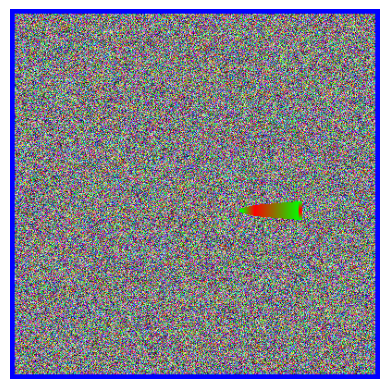

In [7]:
W = 400
H = 400

bg_clr = (255, 255, 255)
vp = np.full((H, W, 3), bg_clr, dtype='uint8')
vp = Background(vp,H,W)
width = 5
blue = (0,0,255)
vp[:width,:] = blue
vp[:,-width:] = blue
vp[-width:,:] = blue
vp[:,:width] = blue


 # shag   
step = np.random.randint(2, 7)
# pologenie

gran = np.random.randint(2, 5)

num = np.random.randint(0,1)
center = np.random.randint(50, 150, size=2)
x_cent = np.random.randint(width+(step)**2 , W -  (2*step)**2)
y_cent = np.random.randint(width+(step)**2, H  -(2*step)**2)


print(center,x_cent,y_cent)
color1 = np.array([0, 255, 0])
color2 = np.array([255, 0, 0])

arr = []

left = []
right = []



save(arr,"arr.txt", x_cent, y_cent)

arr1, center_x, center_y = read("arr.txt")
print(arr1)
print(center_x, center_y)
print(len(arr))

left,right = createfigure(num,color1,color2,arr,gran)
vp,arr = Zalivka_Grad(vp, right, left, num, arr)



plt.imshow(vp)
plt.axis('off')


In [8]:
def Risunok(C,vp,kraska):
    for i in range(len(C)):
        vp[int(C[i][0]),int(C[i][1])] = kraska[i][1]
    return vp


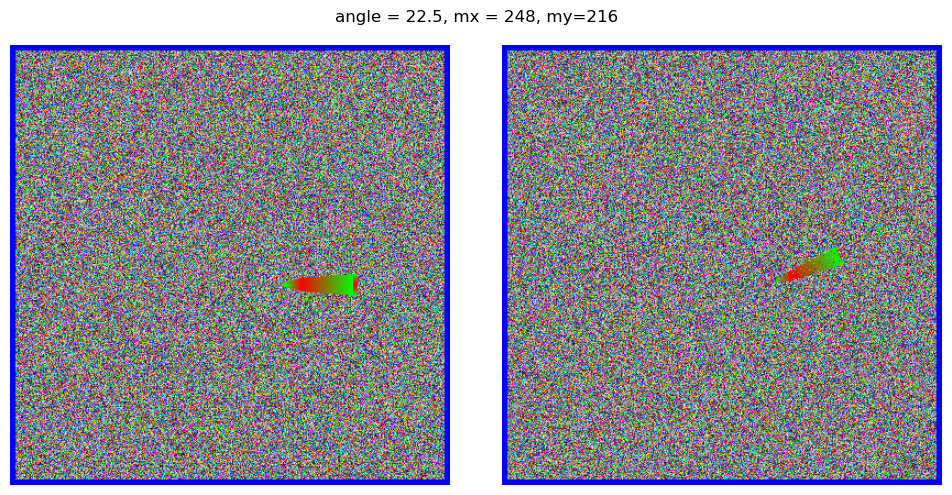

In [9]:
mu= -y_cent
lambd  = -x_cent

fi = (np.pi)/8

R = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([ mu ,lambd ,1]) ])     
R1 = np.array([np.array([ -np.sin(fi), np.cos(fi) , 0]) ,np.array([np.cos(fi), np.sin(fi) ,  0]) , np.array([0 , 0  ,1]) ])
R2 = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([-lambd , -mu,1]) ]) 

C=[]
for i in range(len(arr)):
    C.append([arr[i][0][0], arr[i][0][1], 1])
    
    
C1 = np.dot(C, R)
C1 = np.dot(C1, R1)
C1 = np.dot(C1, R2)


vp1 = np.full((H, W, 3), bg_clr, dtype = 'uint8')
vp1 = Background(vp1, H, W)
vp1 = Risunok(C1,vp1, arr)
width = 5
blue = (0,0,255)
vp1[:width,:] = blue
vp1[:,-width:] = blue
vp1[-width:,:] = blue
vp1[:,:width] = blue


fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')


plt.suptitle(f"angle = {round(math.degrees(fi),4)}, mx = {-mu}, my={-lambd}")
plt.tight_layout()


In [10]:
def Zaliv(vp, h):
    for i in range(len(arr)):
        h[i][1] = (0,255,0)
        vp[h[i][0][1],h[i][0][0]] = (0,255,0)
    return vp, h    

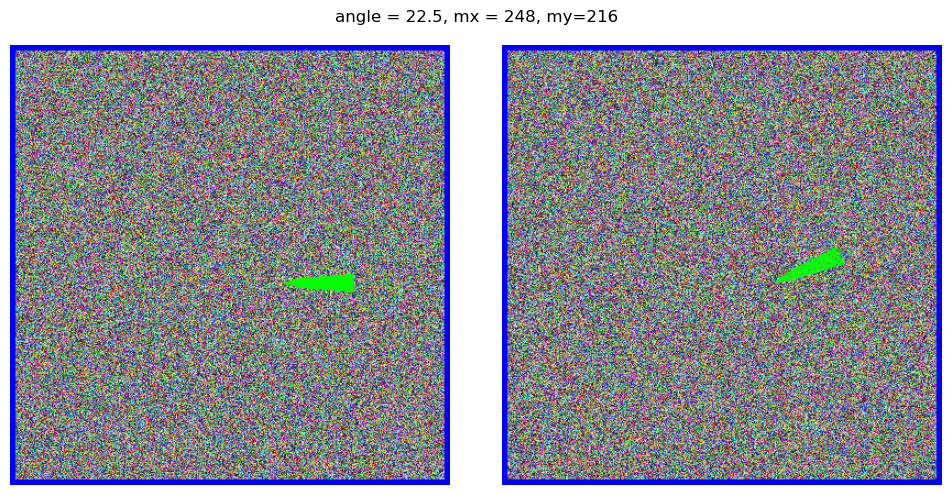

In [11]:
arr2 = []
arr2 =arr.copy()






vp2 = np.full((H, W, 3), bg_clr, dtype='uint8')
vp2 = Background(vp2,H,W)
width = 5
blue = (0,0,255)
vp2[:width,:] = blue
vp2[:,-width:] = blue
vp2[-width:,:] = blue
vp2[:,:width] = blue

vp2, arr2 = Zaliv(vp2, arr2)




C2=[]
for i in range(len(arr2)):
    C2.append([arr2[i][0][0], arr2[i][0][1], 1])
    
    
C2 = np.dot(C, R)
C2 = np.dot(C2, R1)
C2 = np.dot(C2, R2)

vp3 = np.full((H, W, 3), bg_clr, dtype = 'uint8')
vp3 = Background(vp3, H, W)
vp3 = Risunok(C2,vp3, arr2)
width = 5
blue = (0,0,255)
vp3[:width,:] = blue
vp3[:,-width:] = blue
vp3[-width:,:] = blue
vp3[:,:width] = blue

fig,axs=plt.subplots(1,2,figsize=(10,5))


axs[0].imshow(vp2)
axs[0].axis('off')

axs[1].imshow(vp3)
axs[1].axis('off')


plt.suptitle(f"angle = {round(math.degrees(fi),4)}, mx = {-mu}, my={-lambd}")
plt.tight_layout()
